In [17]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [33]:
results_brute = {}
for feat_num in range(2, 1000, 5):
    X, y = make_classification(n_samples=10000, n_features=feat_num, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results_brute[feat_num] = time.time() - start_time

In [6]:
%%time

results_kd = {}
results_kd_fit = {}
results_kd_predict = {}
for feat_num in range(2, 1000, 5):
    X, y = make_classification(n_samples=10000, n_features=feat_num, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    start_time = time.time()
    model.fit(X_train, y_train)
    results_kd_fit[feat_num] = time.time() - start_time
    
    fit_start_time = time.time()
    pred = model.predict(X_test)
    results_kd_predict[feat_num] = time.time() - fit_start_time
    
    results_kd[feat_num] = time.time() - start_time

Wall time: 39min 18s


<br>

<font size=3>Lets look at the dependence of the execution time on the dimensionality of the feature space. In this experiment, the number of objects is constant and equal to 10000.</font>

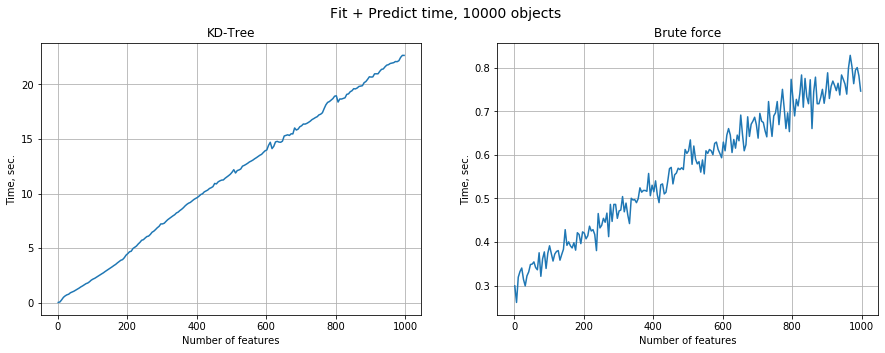

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('KD-Tree')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd.keys()), list(results_kd.values()))

ax2.set_title('Brute force')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_brute.keys()), list(results_brute.values()))

f.suptitle("Fit + Predict time, 10000 objects", fontsize=14)
plt.savefig(fname='kd_brute_comparsion.pdf', format='pdf')

In [12]:
import pickle

In [13]:
with open('results_kd.pickle', 'wb') as handle:
    pickle.dump(results_kd, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
with open('results_kd.pickle', 'rb') as handle:
    results_kd = pickle.load(handle)

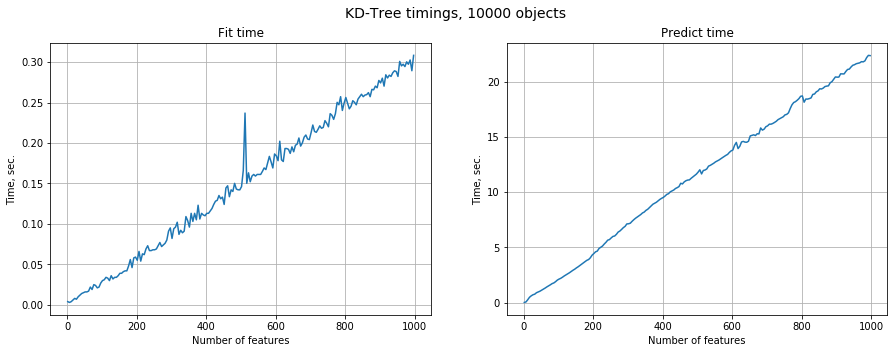

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Fit time')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd_fit.keys()), list(results_kd_fit.values()))

ax2.set_title('Predict time')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_kd_predict.keys()), list(results_kd_predict.values()))

f.suptitle("KD-Tree timings, 10000 objects", fontsize=14)
plt.savefig(fname='kd_fit_predict.pdf', format='pdf')

Brute force outperfmorms kd-tree. Lets see which algorithm will win if we consider low dimensional feature space.

In [39]:
results_brute = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=5, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results_brute[test_num] = time.time() - start_time

In [40]:
%%time

results_kd = {}
results_kd_fit = {}
results_kd_predict = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=5, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    start_time = time.time()
    model.fit(X_train, y_train)
    results_kd_fit[test_num] = time.time() - start_time
    
    fit_start_time = time.time()
    pred = model.predict(X_test)
    results_kd_predict[test_num] = time.time() - fit_start_time
    
    results_kd[test_num] = time.time() - start_time

Wall time: 31.5 s


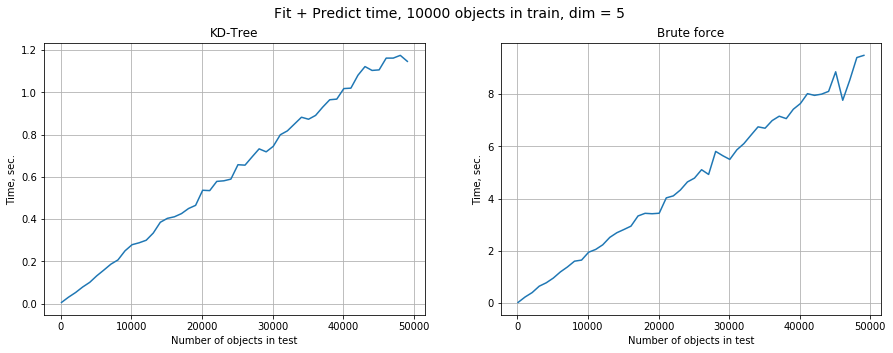

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('KD-Tree')
ax1.set_xlabel('Number of objects in test')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd.keys()), list(results_kd.values()))

ax2.set_title('Brute force')
ax2.set_xlabel('Number of objects in test')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_brute.keys()), list(results_brute.values()))

f.suptitle("Fit + Predict time, 10000 objects in train, dim = 5", fontsize=14)
plt.savefig(fname='low_dim_kd_brute_comp.pdf', format='pdf')

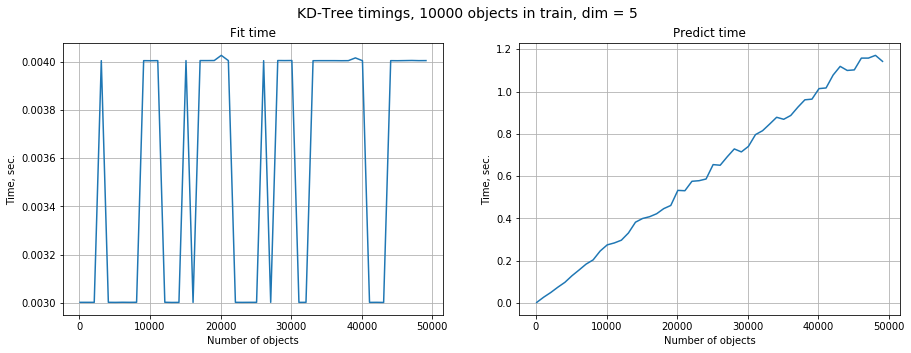

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Fit time')
ax1.set_xlabel('Number of objects')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd_fit.keys()), list(results_kd_fit.values()))

ax2.set_title('Predict time')
ax2.set_xlabel('Number of objects')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_kd_predict.keys()), list(results_kd_predict.values()))

f.suptitle("KD-Tree timings, 10000 objects in train, dim = 5", fontsize=14)
plt.savefig(fname='low_dim_kd_fit_predict.pdf', format='pdf')

<blank>

KD tree data structure works x10 faster.

Lets increase dimensionality to 10.

In [44]:
results_brute = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=10, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results_brute[test_num] = time.time() - start_time

In [45]:
%%time

results_kd = {}
results_kd_fit = {}
results_kd_predict = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=10, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    start_time = time.time()
    model.fit(X_train, y_train)
    results_kd_fit[test_num] = time.time() - start_time
    
    fit_start_time = time.time()
    pred = model.predict(X_test)
    results_kd_predict[test_num] = time.time() - fit_start_time
    
    results_kd[test_num] = time.time() - start_time

Wall time: 2min 10s


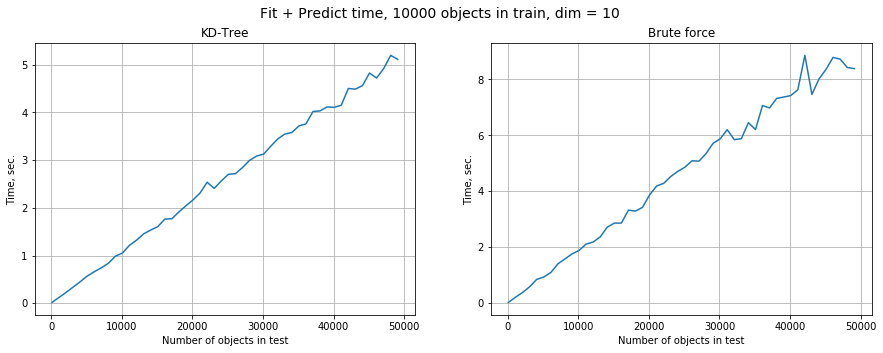

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('KD-Tree')
ax1.set_xlabel('Number of objects in test')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd.keys()), list(results_kd.values()))

ax2.set_title('Brute force')
ax2.set_xlabel('Number of objects in test')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_brute.keys()), list(results_brute.values()))

f.suptitle("Fit + Predict time, 10000 objects in train, dim = 10", fontsize=14)
plt.savefig(fname='low_dim_kd_brute_comp_dim10.pdf', format='pdf')

KD-Tree still performs a bit better... Lets increase dim to 15.

In [47]:
results_brute = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=15, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results_brute[test_num] = time.time() - start_time

In [49]:
%%time

results_kd = {}
results_kd_fit = {}
results_kd_predict = {}
for test_num in range(100, 50000, 1000):
    X, y = make_classification(n_samples=10000 + test_num, n_features=15, random_state=42, n_redundant=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_num, random_state=42)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    start_time = time.time()
    model.fit(X_train, y_train)
    results_kd_fit[test_num] = time.time() - start_time
    
    fit_start_time = time.time()
    pred = model.predict(X_test)
    results_kd_predict[test_num] = time.time() - fit_start_time
    
    results_kd[test_num] = time.time() - start_time

Wall time: 4min 55s


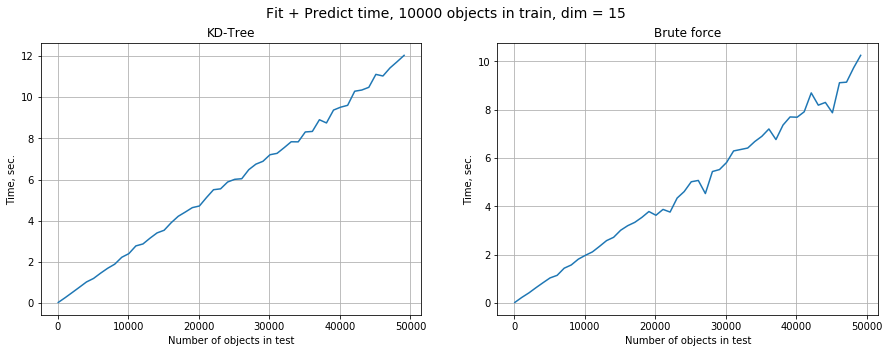

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('KD-Tree')
ax1.set_xlabel('Number of objects in test')
ax1.set_ylabel('Time, sec.')
ax1.grid()
ax1.set
ax1.plot(list(results_kd.keys()), list(results_kd.values()))

ax2.set_title('Brute force')
ax2.set_xlabel('Number of objects in test')
ax2.set_ylabel('Time, sec.')
ax2.grid()
ax2.plot(list(results_brute.keys()), list(results_brute.values()))

f.suptitle("Fit + Predict time, 10000 objects in train, dim = 15", fontsize=14)
plt.savefig(fname='low_dim_kd_brute_comp_dim15.pdf', format='pdf')